In [10]:
import pandas as pd

df = pd.read_csv("Electric_Vehicle_Population_Data.csv")
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5UXTA6C05P,Yakima,Yakima,WA,98903.0,2023,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30,0,14.0,227153587,POINT (-120.477805 46.553505),PACIFICORP,5.307700e+10
1,5YJRE11B48,NaN,NaN,BC,NaN,2008,TESLA,ROADSTER,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,98950,NaN,143609049,NaN,NaN,NaN
2,5YJSA1E24G,King,Seattle,WA,98103.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,43.0,187728201,POINT (-122.34301 47.659185),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
3,1N4AZ1CP5J,King,Shoreline,WA,98177.0,2018,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,151,0,32.0,249867971,POINT (-122.382425 47.77279),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303302e+10
4,5YJ3E1EA6J,Island,Coupeville,WA,98239.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,10.0,223792649,POINT (-122.6880708 48.2179983),PUGET SOUND ENERGY INC,5.302997e+10


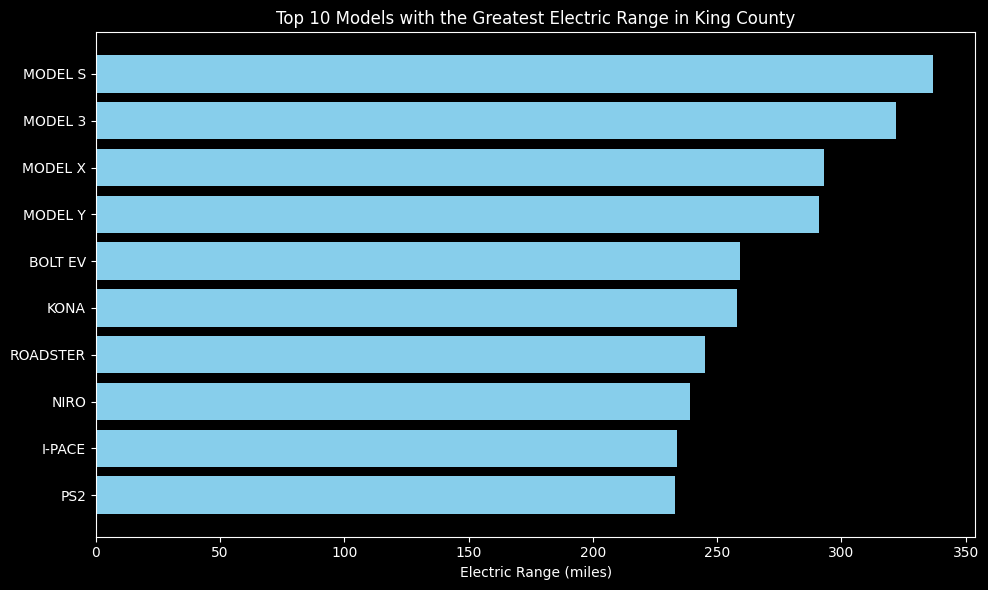

In [11]:
import matplotlib.pyplot as plt  #imports matplotlib library for plotting

df = pd.read_csv("Electric_Vehicle_Population_Data.csv")  #reads the CSV file into a DataFrame named 'df'


king_county = df[df['County'] == 'King']  #filters the DataFrame for records in king county

max_range = king_county.groupby('Model')['Electric Range'].max().reset_index()  #groups data by 'Model' and find the maximum electric range for each

max_range= max_range.sort_values(by='Electric Range', ascending=False)  #sorts the models by electric range in descending order


plt.style.use('dark_background') #setting the style to dark_background
plt.figure(figsize=(10, 6))  #creates a figure with width 10 and height 6
plt.barh(max_range['Model'][:10], max_range['Electric Range'][:10], color='skyblue')  #creates a horizontal bar plot for the top 10 models with their electric range
plt.xlabel('Electric Range (miles)')  #labels the x-axis as 'Electric Range (miles)'
plt.title('Top 10 Models with the Greatest Electric Range in King County')  #sets the title for the plot
plt.gca().invert_yaxis()  #inverts y-axis to display the model with the highest range at the top
plt.tight_layout()  #adjusts layout to prevent clipping of labels
plt.show()  #displays the plot


# Written Analysis:

### Question: What model has the greatest electric range in King?

Comparing the different data series on the graph, we can see that the number 1 model with test electric range is a model S. In second comes the Model 3. This shows that when you live in King cpunt you are most likely to get a Model S or a Model 3.

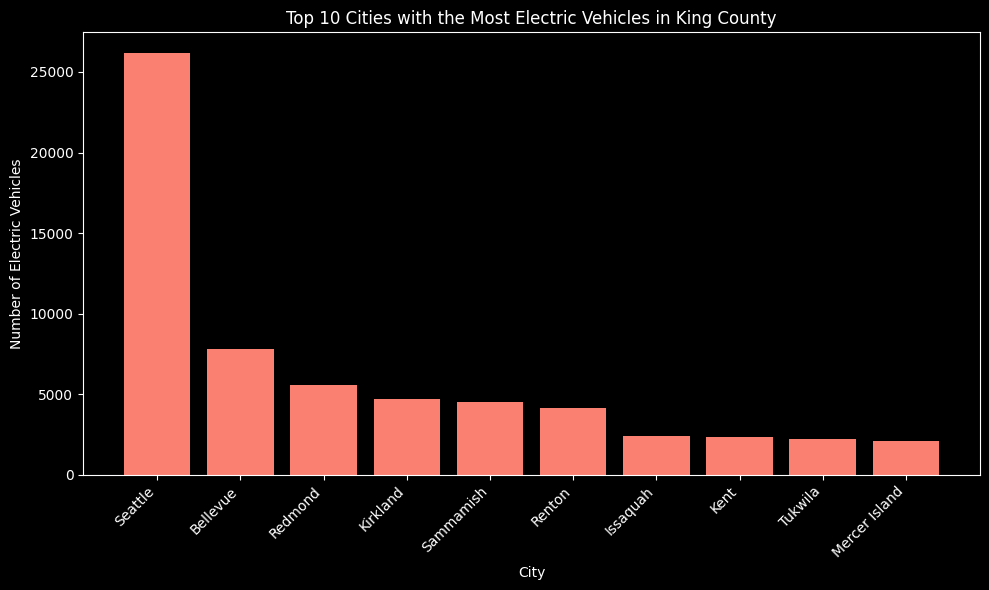

In [12]:
city_pop= king_county['City'].value_counts().reset_index()
city_pop.columns = ['City', 'Electric Vehicles']
#groups data by city and count the number of electric vehicles in each city

city_population = city_pop.sort_values(by='Electric Vehicles', ascending=False)
#sorts cities by the number of electric vehicles in descending order

plt.style.use('dark_background') #changes the style of the plot to dark_background
plt.figure(figsize=(10, 6))#creates a figure with a specific size
plt.bar(city_population['City'][:10], city_population['Electric Vehicles'][:10], color='salmon')#creates a bar plot for the top 10 cities
plt.xlabel('City')#labels for x-axis
plt.ylabel('Number of Electric Vehicles')#labels for y-axis
plt.title('Top 10 Cities with the Most Electric Vehicles in King County')#titles for the plot
plt.xticks(rotation=45, ha='right')#rotates x-axis labels for better readability
plt.tight_layout()#adjusts layout to prevent clipping of labels
plt.show()#display the plot


# Written Analysis:

### Question: What model has the greatest electric range in King?

To gain a deeper understanding, let's focus on the specific trend within the cars within seattle. Seattle has the most electric vehicles in the King county. This is over 20,000 more than the smallest amount from Mercer Island.

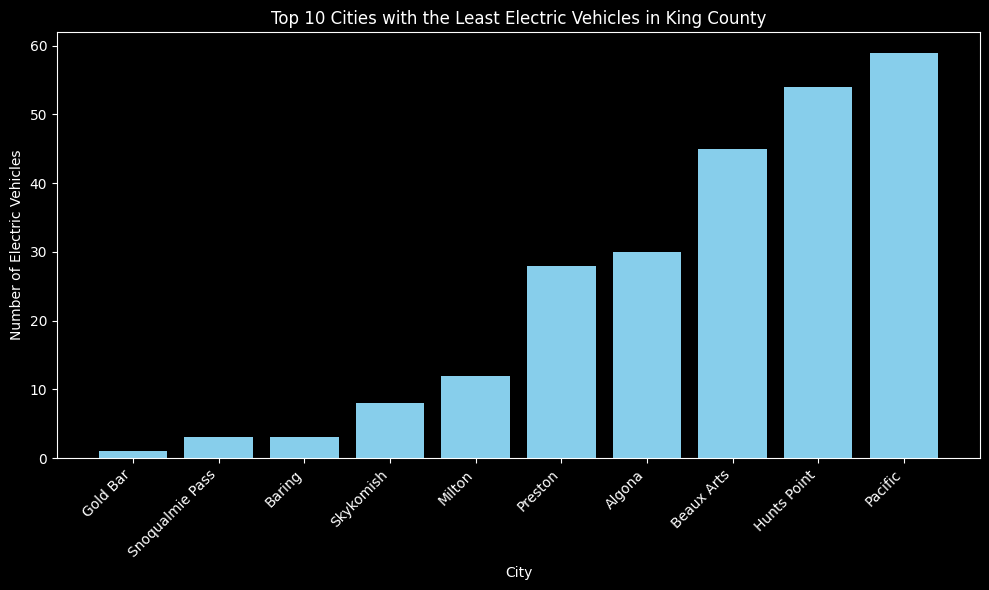

In [13]:
city_population_least = city_pop.sort_values(by='Electric Vehicles', ascending=True)
# Sorts cities by the number of electric vehicles in ascending order

plt.style.use('dark_background')
plt.figure(figsize=(10, 6))
plt.bar(city_population_least['City'][:10], city_population_least['Electric Vehicles'][:10], color='skyblue') # Changed color for distinction
plt.xlabel('City')
plt.ylabel('Number of Electric Vehicles')
plt.title('Top 10 Cities with the Least Electric Vehicles in King County')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Written Analysis:

### Question: What are the Top 10 vehicles with the least electric range in King?

To gain a deeper understanding, let's focus on the specific trend within the cars within seattle. Seattle has the Gold bar least electric vehicles in the King county. Gold bar only has 1 electric vehicle within its area. This is way different from the top city Seatle which has 23000+ more electric vehicles .

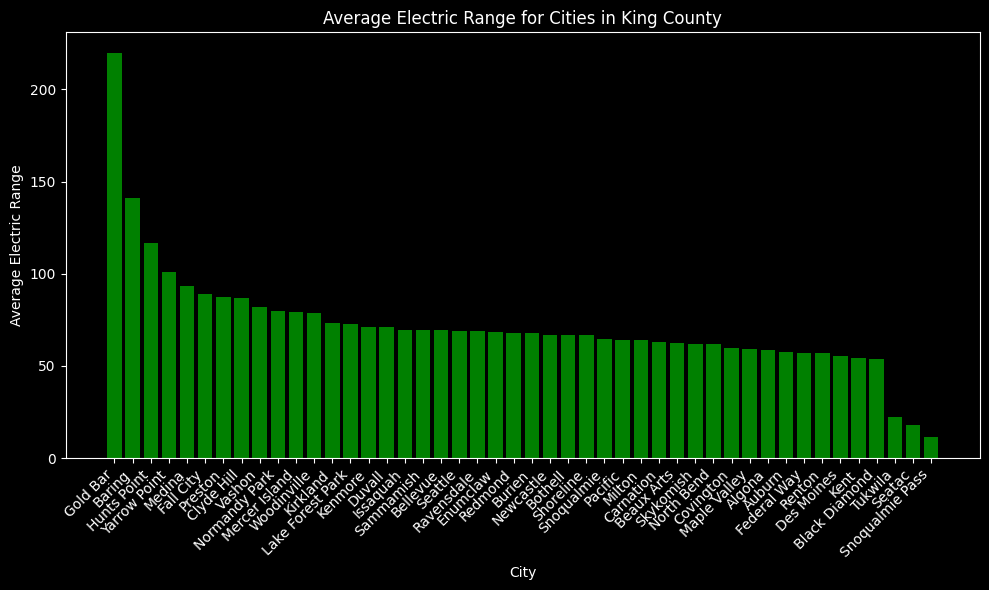

In [14]:
#group data by city and calculate the average electric range for each city
avg_range = king_county.groupby('City')['Electric Range'].mean().reset_index()

#sort cities by average electric range (optional)
avg_range = avg_range.sort_values(by='Electric Range', ascending=False)

#plotting
plt.figure(figsize=(10, 6))#sets the figure size
plt.bar(avg_range['City'], avg_range['Electric Range'], color='green')#creates a bar plot
plt.xlabel('City')#labels the x-axis
plt.ylabel('Average Electric Range')#labels the y-axis
plt.title('Average Electric Range for Cities in King County')#sets the title for the plot
plt.xticks(rotation=45, ha='right')#adjusts x-axis labels for better readability
plt.tight_layout()#adjusts layout to prevent clipping of labels
plt.show()#displays the plot


# Written Analysis:

### Question: What is the average electricrange for cities in the king county

Comparing the different data series on the graph, we can see that the city with the highest average of electric range is Gold Bar, BUT if we remember the previous activity Gold Bar also has only 1 or 2 cars which is why the mean is so HIGH. The distribution is skewed to the right in the given graph.